In [2]:
import numpy as np
import matplotlib.pyplot as plt
import video_utils as vutils
%load_ext autoreload
%autoreload 2

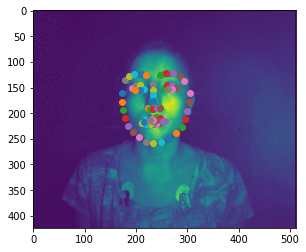

In [3]:
file_root = "your/data/path" #directory that contains the .png images corresponding to each frame of your video
dlib_path = 'shape_predictor_68_face_landmarks.dat' #this file is from: https://github.com/davisking/dlib-models

#Get dictionary with video and dlib landmarks
output_dict = vutils.extract_video_and_landmarks(file_root, dlib_path, plot=True)

#Get landmarks / video
pre_land = output_dict['landmarks']
video = output_dict['image_block']

In [4]:
#Get mask face mask
masks, regions_keys, boosted_landmarks = vutils.get_region_mask(video,pre_land)

In [ ]:
#Get features x frame matrix 
label_grid,video_grid,video_box,masks_box,mask_grid = vutils.get_grid_signals(video,boosted_landmarks,masks,grid_size=5)

In [7]:
print('Features x Time', video_grid.shape)

Features x Time (777, 2500)


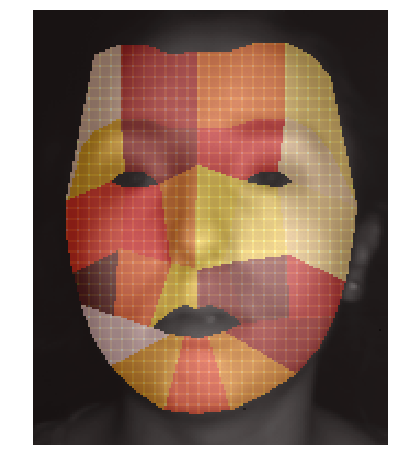

In [10]:
# plot the mean video/ labeled mask and its grid
plt.figure(figsize = (8,8))
plt.imshow(video_box.mean(-1), cmap = 'gray',alpha = 0.9)
plt.imshow(masks_box,cmap = 'hot',alpha = 0.4)
plt.imshow(mask_grid*2,cmap = 'hot',alpha = 0.15)
plt.axis('off')
plt.show()